In [1]:
import numpy as np
from CADMium import Psgrid
from CADMium import Kohnsham
import matplotlib.pyplot as plt

In [2]:
dis_eq      = np.linspace(0.5,5,30)
dis_st      = np.linspace(5.1,10,10)
distances   = np.concatenate((dis_eq, dis_st))
lda_energy  = []

Za, Zb = 1,1
Nmo = [[1,1]]
N   = [[1,1]]
pol = 2
NP, NM = 7, [4,4] 
optKS = {"xc_family"  : "lda",
         "xfunc_id"   : 1,   
         "cfunc_id"   : 12,
         "sym"        : True,
         "fractional" : False}


for d in distances:
    #Initialize Grid and Separation
    a =  d/2
    L = np.arccosh(10./a) 
    loc = np.array(range(-4,5))
    grid = Psgrid(NP, NM, a, L, loc)
    grid.initialize()

    #Kohn Sham Object. SCF Calcualtion
    KS = Kohnsham(grid, Za, Zb, pol, Nmo, N, optKS)
    KS.scf({"disp" : False})
    lda_energy.append(KS.E.E)
    print(f" Distance: {d} -> Energy: {KS.E.E}")
    
# Store results
energy    = np.array(lda_energy)
np.save('h2_distance.npy', distances)
np.save('h2_lda.npy', lda_energy)

 Distance: 0.5 -> Energy: -0.4684324535052049
 Distance: 0.6551724137931034 -> Energy: -0.8083407156250979
 Distance: 0.8103448275862069 -> Energy: -0.97842718732902
 Distance: 0.9655172413793104 -> Energy: -1.0667404443615993
 Distance: 1.1206896551724137 -> Energy: -1.1115704089542473
 Distance: 1.2758620689655173 -> Energy: -1.1318202580552466
 Distance: 1.4310344827586208 -> Energy: -1.1376537973331131
 Distance: 1.5862068965517242 -> Energy: -1.1348780722421599
 Distance: 1.7413793103448276 -> Energy: -1.1269625395137237
 Distance: 1.896551724137931 -> Energy: -1.1160498352041444
 Distance: 2.0517241379310347 -> Energy: -1.1034954497077645
 Distance: 2.206896551724138 -> Energy: -1.090171017251243
 Distance: 2.3620689655172415 -> Energy: -1.0766420207752279
 Distance: 2.5172413793103448 -> Energy: -1.0632755819428226
 Distance: 2.6724137931034484 -> Energy: -1.0503077720307186
 Distance: 2.8275862068965516 -> Energy: -1.0378867213699405
 Distance: 2.9827586206896552 -> Energy: -1.

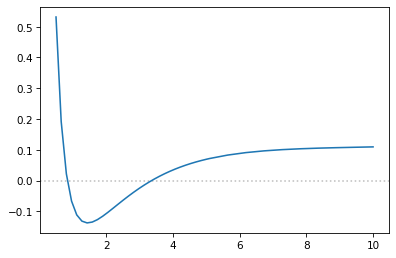

In [3]:
h_energy  = -0.5
energy    = np.array(lda_energy)

fig, ax = plt.subplots(1,1, dpi=75)

ax.axhline(y=0, alpha=0.5, c="grey", ls=":")
ax.plot(distances, energy - 2*h_energy)
# ax.set_ylim(-1.2,-0.1)